In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [4]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

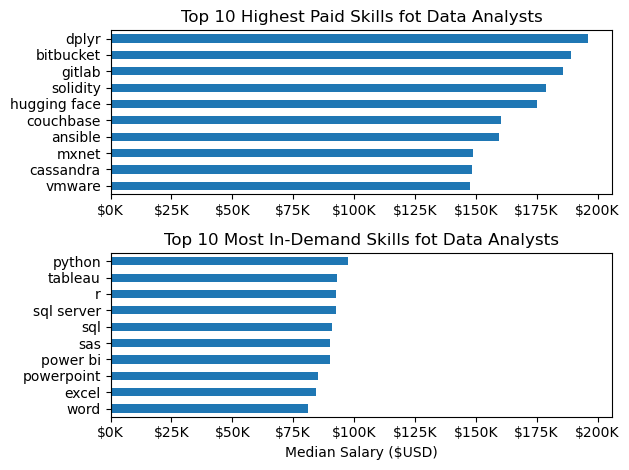

In [ ]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills fot Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=0)
ax[1].set_title('Top 10 Most In-Demand Skills fot Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()


# Data for Croatia


In [6]:
df_DA_CRO = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Croatia')].copy()

df_DA_CRO = df_DA_CRO.dropna(subset=['salary_year_avg'])

df_DA_CRO

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
285236,Data Analyst,PowerBI Data Analyst,Croatia,via Ai-Jobs.net,Full-time,False,Croatia,2023-12-20 17:34:08,False,False,Croatia,year,61169.0,NaN,HTEC Group,"[sql, azure, snowflake, power bi, tableau, qlik]","{'analyst_tools': ['power bi', 'tableau', 'qli..."
330043,Data Analyst,Junior Data Analyst (m/f),"Zagreb, Croatia",via Ai-Jobs.net,Full-time,False,Croatia,2023-01-11 23:31:01,True,False,Croatia,year,45000.0,NaN,Nanobit,"[sql, r, python, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr..."
587223,Data Analyst,Student Assistant for Data Management (m/f/d),"Zagreb, Croatia",via Ai-Jobs.net,Part-time,False,Croatia,2023-06-03 09:29:40,False,False,Croatia,year,56700.0,NaN,Nets,[powerpoint],{'analyst_tools': ['powerpoint']}
636066,Data Analyst,Clinical Data Manager,"Zagreb, Croatia",via Ai-Jobs.net,Full-time,False,Croatia,2023-02-14 12:35:44,False,False,Croatia,year,56700.0,NaN,PSI CRO,[oracle],{'cloud': ['oracle']}


In [7]:
df_DA_CRO = df_DA_CRO.explode('job_skills')

df_DA_CRO[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
285236,61169.0,sql
285236,61169.0,azure
285236,61169.0,snowflake
285236,61169.0,power bi
285236,61169.0,tableau
285236,61169.0,qlik
330043,45000.0,sql
330043,45000.0,r
330043,45000.0,python
330043,45000.0,tableau


In [8]:
df_DA_CRO_group = df_DA_CRO.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay_cro = df_DA_CRO_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills_cro = df_DA_CRO_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

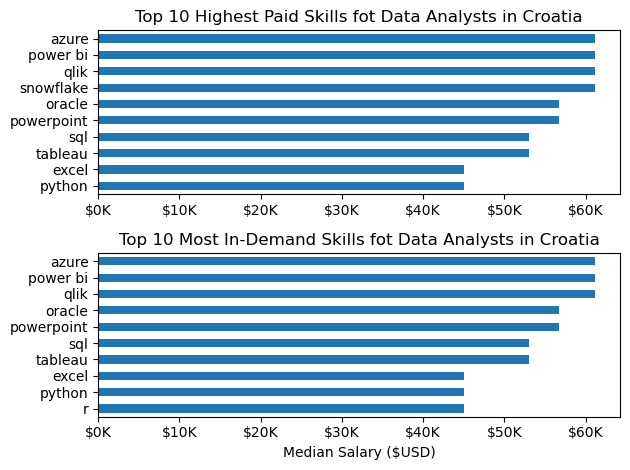

In [9]:
fig, ax = plt.subplots(2,1)

df_DA_top_pay_cro[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills fot Data Analysts in Croatia')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


df_DA_skills_cro[::-1].plot(kind='barh', y='median', ax=ax[1], legend=0)
ax[1].set_title('Top 10 Most In-Demand Skills fot Data Analysts in Croatia')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
